<a href="https://colab.research.google.com/github/SamuelLemosS/IA/blob/CNN/Classifica%C3%A7%C3%A3o_de_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown
!pip install keras
!pip install tensorflow

In [1]:
!gdown 16OJfX2mBVqNZpdydscrx0FYgDMde2v0a

Downloading...
From: https://drive.google.com/uc?id=16OJfX2mBVqNZpdydscrx0FYgDMde2v0a
To: /content/CNN.zip
100% 725M/725M [00:09<00:00, 72.9MB/s]


In [2]:
!unzip CNN.zip

Archive:  CNN.zip
   creating: CNN/3d/
  inflating: CNN/3d/44testeddtestedd7bb9testedc74testedd69bd7tested4ab4testetestedeb8teste.jpeg  
  inflating: CNN/3d/45etestedd9ftested6testedtestedtestedf4atested68779f5atested49afbteste9.jpeg  
  inflating: CNN/3d/45testedd7c9a9tested8ctestedtested6teste45tested4abfbtestedtestetestede7b95tested.jpg  
  inflating: CNN/3d/45testedd9b6ddb54c45c8aec759b6testeda8e7testedba.jpeg  
  inflating: CNN/3d/46e8testedb9a9etestedtestefaf8bctested86etested5tested5adtestea8c.jpg  
  inflating: CNN/3d/49e8db98ca4e449fbtestedd8dftested959bbeteste99tested.jpeg  
  inflating: CNN/3d/4af7tested4testetested5teste5tested4testedteste7b8teste95ad9testef65dd7e.jpeg  
  inflating: CNN/3d/4c85e76c6testeddf6tested6fbtestecddba69d5b659f.jpg  
  inflating: CNN/3d/4ded8b6687etestedd4etestedtested9a9testeda964testedda9559d.jpeg  
  inflating: CNN/3d/4ectesteddbatestedad5testedaftested8testeddtested5teste9tested6testeda6c8764a.jpg  
  inflating: CNN/3d/4ee86bftesteddcf6tested4e

# CNN

In [3]:
import pandas as pd
import os
import random
import numpy as np
import tensorflow
import shutil

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from glob import glob
from keras import layers, models, optimizers

from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

*Configurando os dados*

In [5]:
train_3d = glob("./CNN/3d/*")
train_Cartoon = glob("./CNN/Cartoon/*")
train_Humano = glob("./CNN/Humano/*")
train_anime = glob("./CNN/anime/*")

train_3d_dir = "./CNN/3d/"
train_Cartoon_dir = "./CNN/Cartoon/"
train_Humano_dir = "./CNN/Humano/"
train_anime_dir = "./CNN/anime/"

In [6]:
extract_path='/content/CNN'

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )

train_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
    )

validation_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation')


Found 1623 images belonging to 4 classes.
Found 405 images belonging to 4 classes.


##1ª arquitetura

In [33]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**Treinamento do modelo**

In [34]:
model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
51/51 [==============================] - 31s 579ms/step - loss: 1.0077 - accuracy: 0.5576 - val_loss: 0.5694 - val_accuracy: 0.7827
Epoch 2/10
51/51 [==============================] - 26s 503ms/step - loss: 0.4757 - accuracy: 0.8145 - val_loss: 0.3719 - val_accuracy: 0.8346
Epoch 3/10
51/51 [==============================] - 26s 508ms/step - loss: 0.3290 - accuracy: 0.8626 - val_loss: 0.3417 - val_accuracy: 0.8840
Epoch 4/10
51/51 [==============================] - 26s 505ms/step - loss: 0.3033 - accuracy: 0.8718 - val_loss: 0.2600 - val_accuracy: 0.9012
Epoch 5/10
51/51 [==============================] - 26s 511ms/step - loss: 0.2767 - accuracy: 0.8835 - val_loss: 0.2479 - val_accuracy: 0.8963
Epoch 6/10
51/51 [==============================] - 26s 516ms/step - loss: 0.2639 - accuracy: 0.8860 - val_loss: 0.3398 - val_accuracy: 0.8370
Epoch 7/10
51/51 [==============================] - 30s 596ms/step - loss: 0.2311 - accuracy: 0.9076 - val_loss: 0.2879 - val_accuracy: 0.8691

**Para relatório**

In [35]:
model.evaluate(validation_generator)

13/13 [==============================] - 5s 347ms/step - loss: 0.2211 - accuracy: 0.9037


[0.22113405168056488, 0.9037036895751953]

In [36]:
import matplotlib.pyplot as plt
import numpy as np

###Predições

1/1 [==============================] - 0s 81ms/step


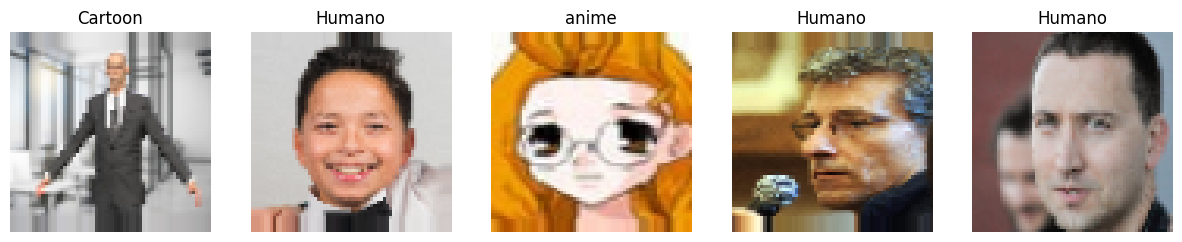

In [37]:
def plot_images_with_predictions_cnn(model, generator, num_images=5):
    # Obter um lote de imagens e rótulos do gerador
    images, true_labels = generator.next()

    # Fazer predições para o lote de imagens
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)


    # Exibir as imagens com previsões
    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        if predicted_labels[i] == 0:
            mostrar = '3d'
        elif predicted_labels[i] == 1:
            mostrar = 'Cartoon'
        elif predicted_labels[i] == 2:
            mostrar = 'Humano'
        elif predicted_labels[i] == 3:
            mostrar = 'anime'
        else:
            mostrar = 'Classe não reconhecida'
        plt.title(f'{mostrar}')
        plt.axis('off')

    plt.show()
plot_images_with_predictions_cnn(model, validation_generator)

In [ ]:
predictions_cnn = model.predict(validation_generator)

13/13 [==============================] - 5s 358ms/step


In [ ]:
true_labels_cnn = validation_generator.classes

In [ ]:
file_names_cnn = validation_generator.filenames

In [ ]:
predicted_labels_cnn = predictions_cnn.argmax(axis=1)

In [ ]:
import pandas as pd

In [ ]:
report_data_cnn = {'File Name': file_names_cnn, 'True Label': true_labels_cnn, 'Predicted Label': predicted_labels_cnn}
report_df_cnn = pd.DataFrame(report_data_cnn)

In [ ]:
report_df_cnn.to_csv('/content/drive/MyDrive/ia/validation_report_cnn.csv', index=False)

##**2ª Arquitetura**

In [8]:
from tensorflow.keras.layers import Dropout

In [9]:
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(4, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model2.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
51/51 [==============================] - 40s 523ms/step - loss: 0.9317 - accuracy: 0.5847 - val_loss: 0.4601 - val_accuracy: 0.8346
Epoch 2/10
51/51 [==============================] - 27s 536ms/step - loss: 0.4503 - accuracy: 0.8139 - val_loss: 0.3448 - val_accuracy: 0.8593
Epoch 3/10
51/51 [==============================] - 26s 514ms/step - loss: 0.3594 - accuracy: 0.8577 - val_loss: 0.2654 - val_accuracy: 0.8864
Epoch 4/10
51/51 [==============================] - 26s 516ms/step - loss: 0.3036 - accuracy: 0.8768 - val_loss: 0.2603 - val_accuracy: 0.9160
Epoch 5/10
51/51 [==============================] - 26s 516ms/step - loss: 0.2671 - accuracy: 0.8866 - val_loss: 0.2637 - val_accuracy: 0.9012
Epoch 6/10
51/51 [==============================] - 26s 516ms/step - loss: 0.2513 - accuracy: 0.8983 - val_loss: 0.2194 - val_accuracy: 0.9086
Epoch 7/10
51/51 [==============================] - 30s 602ms/step - loss: 0.2422 - accuracy: 0.9002 - val_loss: 0.2232 - val_accuracy: 0.9062

In [11]:
model2.evaluate(validation_generator)

13/13 [==============================] - 5s 364ms/step - loss: 0.2162 - accuracy: 0.9259


[0.21622386574745178, 0.9259259104728699]

###Predições

1/1 [==============================] - 0s 96ms/step


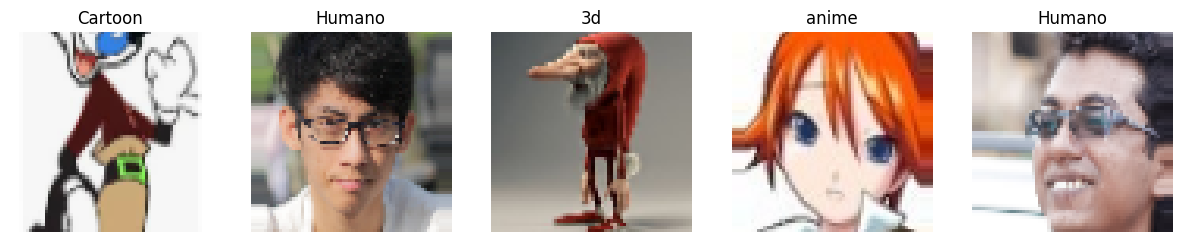

In [12]:
def plot_images_with_predictions_cnn(model2, generator, num_images=5):
    # Obter um lote de imagens e rótulos do gerador
    images, true_labels = generator.next()

    # Fazer predições para o lote de imagens
    predictions = model2.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)


    # Exibir as imagens com previsões
    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        if predicted_labels[i] == 0:
            mostrar = '3d'
        elif predicted_labels[i] == 1:
            mostrar = 'Cartoon'
        elif predicted_labels[i] == 2:
            mostrar = 'Humano'
        elif predicted_labels[i] == 3:
            mostrar = 'anime'
        else:
            mostrar = 'Classe não reconhecida'
        plt.title(f'{mostrar}')
        plt.axis('off')

    plt.show()
plot_images_with_predictions_cnn(model2, validation_generator)

In [ ]:
predictions_cnn2 = model2.predict(validation_generator)

13/13 [==============================] - 6s 454ms/step


In [ ]:
true_labels_cnn2 = validation_generator.classes

In [ ]:
file_names_cnn2 = validation_generator.filenames

In [ ]:
predicted_labels_cnn2 = predictions_cnn2.argmax(axis=1)

In [ ]:
report_data_cnn2 = {'File Name': file_names_cnn2, 'True Label': true_labels_cnn2, 'Predicted Label': predicted_labels_cnn2}
report_df_cnn2 = pd.DataFrame(report_data_cnn2)

In [ ]:
report_df_cnn2.to_csv('/content/drive/MyDrive/ia/validation_report_cnn2.csv', index=False)

# Transfer Learning

## Primeiro modelo: *MobileNetV2*

In [13]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [14]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

9406464/9406464 [==============================] - 0s 0us/step


In [15]:
for layer in base_model.layers:
    layer.trainable = False

In [16]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

In [17]:
model_transfer = Model(inputs=base_model.input, outputs=predictions)

In [18]:
model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model_transfer.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
51/51 [==============================] - 33s 582ms/step - loss: 0.6075 - accuracy: 0.7924 - val_loss: 0.4485 - val_accuracy: 0.8691
Epoch 2/10
51/51 [==============================] - 26s 516ms/step - loss: 0.3366 - accuracy: 0.8799 - val_loss: 0.3044 - val_accuracy: 0.8790
Epoch 3/10
51/51 [==============================] - 26s 510ms/step - loss: 0.1925 - accuracy: 0.9310 - val_loss: 0.3181 - val_accuracy: 0.8889
Epoch 4/10
51/51 [==============================] - 26s 504ms/step - loss: 0.2169 - accuracy: 0.9279 - val_loss: 0.3263 - val_accuracy: 0.8963
Epoch 5/10
51/51 [==============================] - 25s 499ms/step - loss: 0.1533 - accuracy: 0.9427 - val_loss: 0.2817 - val_accuracy: 0.8914
Epoch 6/10
51/51 [==============================] - 26s 510ms/step - loss: 0.1465 - accuracy: 0.9476 - val_loss: 0.2821 - val_accuracy: 0.8938
Epoch 7/10
51/51 [==============================] - 25s 495ms/step - loss: 0.1358 - accuracy: 0.9507 - val_loss: 0.3314 - val_accuracy: 0.8914

In [20]:
model_transfer.evaluate(validation_generator)

13/13 [==============================] - 5s 371ms/step - loss: 0.2875 - accuracy: 0.9210


[0.2875311076641083, 0.9209876656532288]

###Predições

1/1 [==============================] - 1s 766ms/step


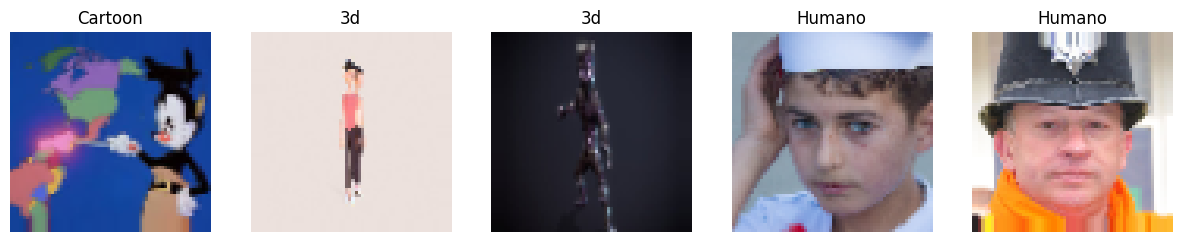

In [30]:
def plot_images_with_predictions_cnn(model_transfer, generator, num_images=5):
    # Obter um lote de imagens e rótulos do gerador
    images, true_labels = generator.next()

    # Fazer predições para o lote de imagens
    predictions = model_transfer.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)


    # Exibir as imagens com previsões
    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        if predicted_labels[i] == 0:
            mostrar = '3d'
        elif predicted_labels[i] == 1:
            mostrar = 'Cartoon'
        elif predicted_labels[i] == 2:
            mostrar = 'Humano'
        elif predicted_labels[i] == 3:
            mostrar = 'anime'
        else:
            mostrar = 'Classe não reconhecida'
        plt.title(f'{mostrar}')
        plt.axis('off')

    plt.show()
plot_images_with_predictions_cnn(model_transfer, validation_generator)

In [ ]:
predictions_transfer = model_transfer.predict(validation_generator)

13/13 [==============================] - 5s 345ms/step


In [ ]:
true_labels_transfer = validation_generator.classes

In [ ]:
file_names_transfer = validation_generator.filenames

In [ ]:
predicted_labels_transfer = predictions_transfer.argmax(axis=1)

In [ ]:
report_data_transfer = {'File Name': file_names_transfer, 'True Label': true_labels_transfer, 'Predicted Label': predicted_labels_transfer}
report_df_transfer = pd.DataFrame(report_data_transfer)

In [ ]:
report_df_transfer.to_csv('/content/drive/MyDrive/ia/validation_report_transfer.csv', index=False)

## Segundo modelo: *EfficientNetB0*

In [22]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

In [23]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

16705208/16705208 [==============================] - 0s 0us/step


In [24]:
for layer in base_model.layers:
    layer.trainable = False

In [25]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

In [26]:
model_efficientnet = Model(inputs=base_model.input, outputs=predictions)

In [27]:
model_efficientnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model_efficientnet.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
51/51 [==============================] - 49s 776ms/step - loss: 1.4975 - accuracy: 0.2680 - val_loss: 1.4040 - val_accuracy: 0.2469
Epoch 2/10
51/51 [==============================] - 30s 580ms/step - loss: 1.4112 - accuracy: 0.2403 - val_loss: 1.3875 - val_accuracy: 0.2469
Epoch 3/10
51/51 [==============================] - 26s 511ms/step - loss: 1.3931 - accuracy: 0.2421 - val_loss: 1.3866 - val_accuracy: 0.2469
Epoch 4/10
51/51 [==============================] - 26s 523ms/step - loss: 1.3879 - accuracy: 0.2594 - val_loss: 1.3858 - val_accuracy: 0.2593
Epoch 5/10
51/51 [==============================] - 26s 525ms/step - loss: 1.3862 - accuracy: 0.2569 - val_loss: 1.3857 - val_accuracy: 0.2593
Epoch 6/10
51/51 [==============================] - 30s 601ms/step - loss: 1.3861 - accuracy: 0.2637 - val_loss: 1.3857 - val_accuracy: 0.2593
Epoch 7/10
51/51 [==============================] - 26s 504ms/step - loss: 1.3862 - accuracy: 0.2526 - val_loss: 1.3855 - val_accuracy: 0.2593

In [29]:
model_efficientnet.evaluate(validation_generator)

13/13 [==============================] - 5s 375ms/step - loss: 1.3861 - accuracy: 0.2593


[1.3860924243927002, 0.25925925374031067]

###Predições

1/1 [==============================] - 0s 24ms/step


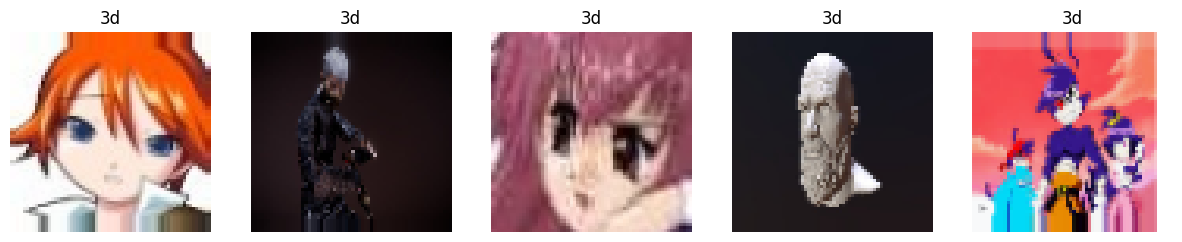

In [32]:
def plot_images_with_predictions_cnn(model_efficientnet, generator, num_images=5):
    # Obter um lote de imagens e rótulos do gerador
    images, true_labels = generator.next()

    # Fazer predições para o lote de imagens
    predictions = model_efficientnet.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)


    # Exibir as imagens com previsões
    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        if predicted_labels[i] == 0:
            mostrar = '3d'
        elif predicted_labels[i] == 1:
            mostrar = 'Cartoon'
        elif predicted_labels[i] == 2:
            mostrar = 'Humano'
        elif predicted_labels[i] == 3:
            mostrar = 'anime'
        else:
            mostrar = 'Classe não reconhecida'
        plt.title(f'{mostrar}')
        plt.axis('off')

    plt.show()
plot_images_with_predictions_cnn(model_efficientnet, validation_generator)

In [ ]:
predictions = model_efficientnet.predict(validation_generator)

13/13 [==============================] - 5s 329ms/step


In [ ]:
true_labels = validation_generator.classes

In [ ]:
file_names = validation_generator.filenames

In [ ]:
predicted_labels = predictions.argmax(axis=1)

In [ ]:
report_data = {'File Name': file_names, 'True Label': true_labels, 'Predicted Label': predicted_labels}
report_df = pd.DataFrame(report_data)

In [ ]:
report_df.to_csv('/content/drive/MyDrive/ia/validation_report.csv', index=False)